<a href="https://colab.research.google.com/github/sagnikbiswas/My_sklearn_notebooks/blob/main/decision_tree_classifier_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a classifier decision tree using scikit-learn library to classify `drug200.csv` dataset. 

In [191]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics    #for checking accuracy
import matplotlib.pyplot as plt    #for visualization
from sklearn import tree    #for visualization

Loading the dataset `drug200.csv`

In [195]:
df = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv")
#df = pd.read_csv("drug200.csv")    #import from local storage if link does not work
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [196]:
# should encode string attributes to one hot vector, but for easy demonstration we will simply replace with numeric values
df.replace({'Sex':{'F':0, 'M':1}, 'BP':{'LOW':0, 'NORMAL':1, 'HIGH':2}, 'Cholesterol': {'NORMAL':0, 'HIGH':1}}, inplace=True)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY


In [197]:
np.shape(df)

(200, 6)

200 samples with 6 columns each.

In [198]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

There are 5 different drugs.

In [199]:
# Predictor attributes
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,1,25.355
1,47,1,0,1,13.093
2,47,1,0,1,10.114
3,28,0,1,1,7.798
4,61,0,0,1,18.043


In [200]:
#target value
y = df["Drug"]
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

Splitting the dataset into testing and training data randomly. Depending on different random seeds we might get different trees.

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

###Build

In [221]:
Tree = DecisionTreeClassifier(criterion="entropy")

# to show all parameters
Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###Train

In [222]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###Test

In [223]:
pred =Tree.predict(X_test)
pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugX', 'drugC', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugA', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugY', 'drugX', 'drugA', 'drugC',
       'drugX', 'dru

In [224]:
print (f"Predicted result: {pred [:9]}")
print (f"Actual result:    {y_test [:9].to_numpy()}")

Predicted result: ['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB']
Actual result:    ['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB']


In [225]:
print(f"Accuracy of our decision tree is {metrics.accuracy_score(y_test,pred)*100}%")

Accuracy of our decision tree is 99.0%


###Visualization

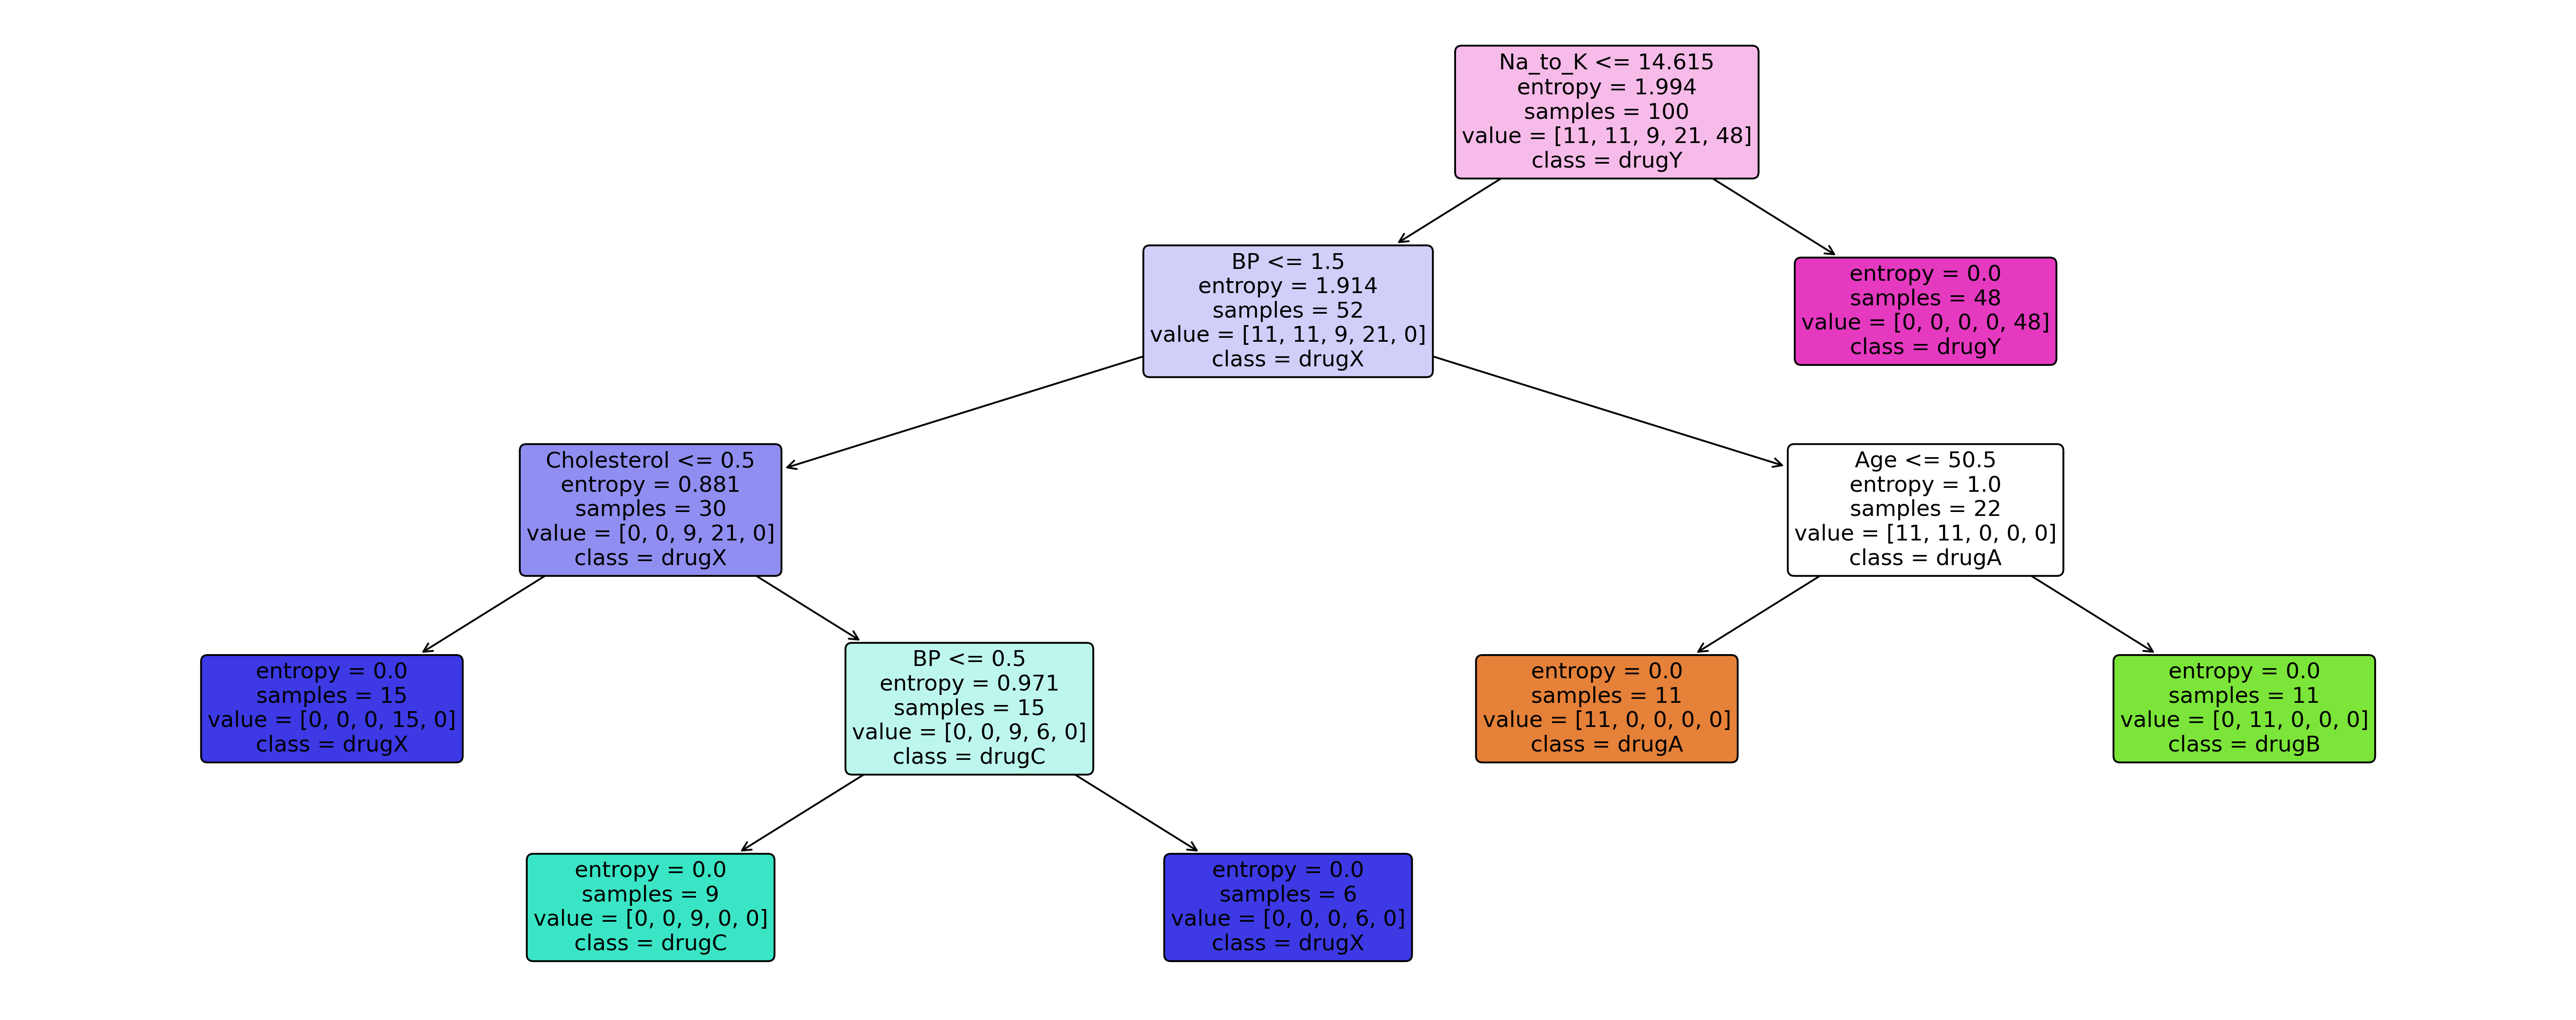

In [226]:
plt.figure(figsize=(25,10), dpi=300)

tree.plot_tree(
    Tree,
    filled=True, 
    rounded=True, 
    fontsize=12,
    class_names=Tree.classes_,
    feature_names=X.columns
)

plt.savefig('DTree.png')